**Seeding for reproducibility**

In [2]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

**Importing the dependencies**

In [19]:
import json
from PIL import Image

import numpy as np
from math import ceil
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Conv2D , MaxPooling2D , Flatten ,Dense ,Dropout
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential

**Data Preprocessing**

In [4]:
# Dataset Path
base_dir = './dataset'

In [5]:
# Image Parameters
img_size = 224
batch_size = 32

**Train Test Split**

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.3  # Use 20% of data for validation
)

In [7]:
val_datagen = ImageDataGenerator(
 rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.3 # Use 20% of data for validation
)

In [8]:
# Train Generator
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 9328 images belonging to 10 classes.


In [9]:
# Validation Generator
validation_generator = val_datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 3991 images belonging to 10 classes.


**Convolutional Neural Network**

In [21]:
# Model Definition
input_shape = (img_size, img_size, 3)


model = Sequential()
model.add(Conv2D(filters=16 ,kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False ,input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=32 ,kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=64 ,kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=128 , kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=256 , kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(250,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))


model.summary()

d:\rice_disease_detection\env\rice_disease_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 16)   │           432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 74, 74, 32)     │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 256)      │       294,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 250)            │       256,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        25,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 674,472 (2.57 MB)

 Trainable params: 674,472 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# model summary
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 16)   │           432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 74, 74, 32)     │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 256)      │       294,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 250)            │       256,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        25,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 674,472 (2.57 MB)

 Trainable params: 674,472 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Compile the Model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Model training**

In [24]:
# Training the Model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=30,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,  # Validation steps
    callbacks=[early_stopping]
    )

Epoch 1/30


d:\rice_disease_detection\env\rice_disease_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


291/291 ━━━━━━━━━━━━━━━━━━━━ 765s 3s/step - accuracy: 0.2161 - loss: 2.1367 - val_accuracy: 0.3531 - val_loss: 1.7341
Epoch 2/30
  1/291 ━━━━━━━━━━━━━━━━━━━━ 42s 148ms/step - accuracy: 0.2500 - loss: 1.6825

d:\rice_disease_detection\env\rice_disease_env\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2500 - loss: 1.6825 - val_accuracy: 0.3478 - val_loss: 1.7409
Epoch 3/30
291/291 ━━━━━━━━━━━━━━━━━━━━ 294s 998ms/step - accuracy: 0.3937 - loss: 1.6194 - val_accuracy: 0.4612 - val_loss: 1.3631
Epoch 4/30
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3438 - loss: 1.7222 - val_accuracy: 0.5217 - val_loss: 1.4838
Epoch 5/30
291/291 ━━━━━━━━━━━━━━━━━━━━ 318s 1s/step - accuracy: 0.4795 - loss: 1.4134 - val_accuracy: 0.5121 - val_loss: 1.2662
Epoch 6/30
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4375 - loss: 1.4230 - val_accuracy: 0.5652 - val_loss: 1.1512
Epoch 7/30
291/291 ━━━━━━━━━━━━━━━━━━━━ 296s 1s/step - accuracy: 0.5515 - loss: 1.2103 - val_accuracy: 0.5867 - val_loss: 1.0469
Epoch 8/30
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6250 - loss: 1.0819 - val_accuracy: 0.5217 - val_loss: 0.9953
Epoch 9/30
291/291 ━━━━━━━━━━━━━━━━━━━━ 263s 888ms/step - accuracy: 0.6091 - loss: 1.0838 - val_accuracy: 0.6

**Model Evaluation**

In [25]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
124/124 ━━━━━━━━━━━━━━━━━━━━ 69s 558ms/step - accuracy: 0.7808 - loss: 0.5880
Validation Accuracy: 78.20%


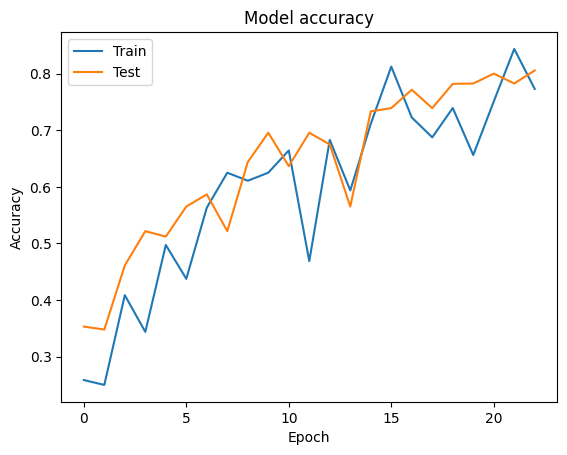

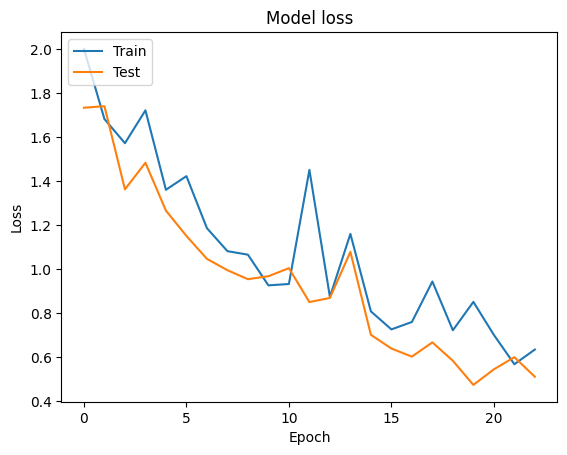

In [26]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Building a Predictive System**

In [28]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [29]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [30]:
class_indices

{0: 'Bacterial Blight',
 1: 'Blast',
 2: 'Brown Spot',
 3: 'Healthy Rice',
 4: 'Leaf Blast',
 5: 'Leaf Scald',
 6: 'Narrow Brown Leaf Spot',
 7: 'Rice Hispa',
 8: 'Sheath Blight',
 9: 'Tungro'}

In [31]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [35]:
# Example Usage
image_path = './dataset/Tungro/TUNGRO1_006.jpg'
# image_path = './dataset/Healthy Rice/Healthy_rice_leaf  (6).jpg'
# image_path = './dataset/Narrow Brown Leaf Spot/Narrow_brown_leaf_spot  (3).jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Class Name: Tungro


**Save the model to Google drive or local**

In [36]:
model.save('ricemodelnew2.h5')